# Calculate Intrinsic Value of a Stock

## Import Packages to Extract and Present Data

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
import seaborn as sns
import plotly.express as px

# To extract and parse fundamental data like beta and growth estimates from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

## Enter  Financial Modeling Prep API Key and Ticker, to Obtain Financial Statements Data

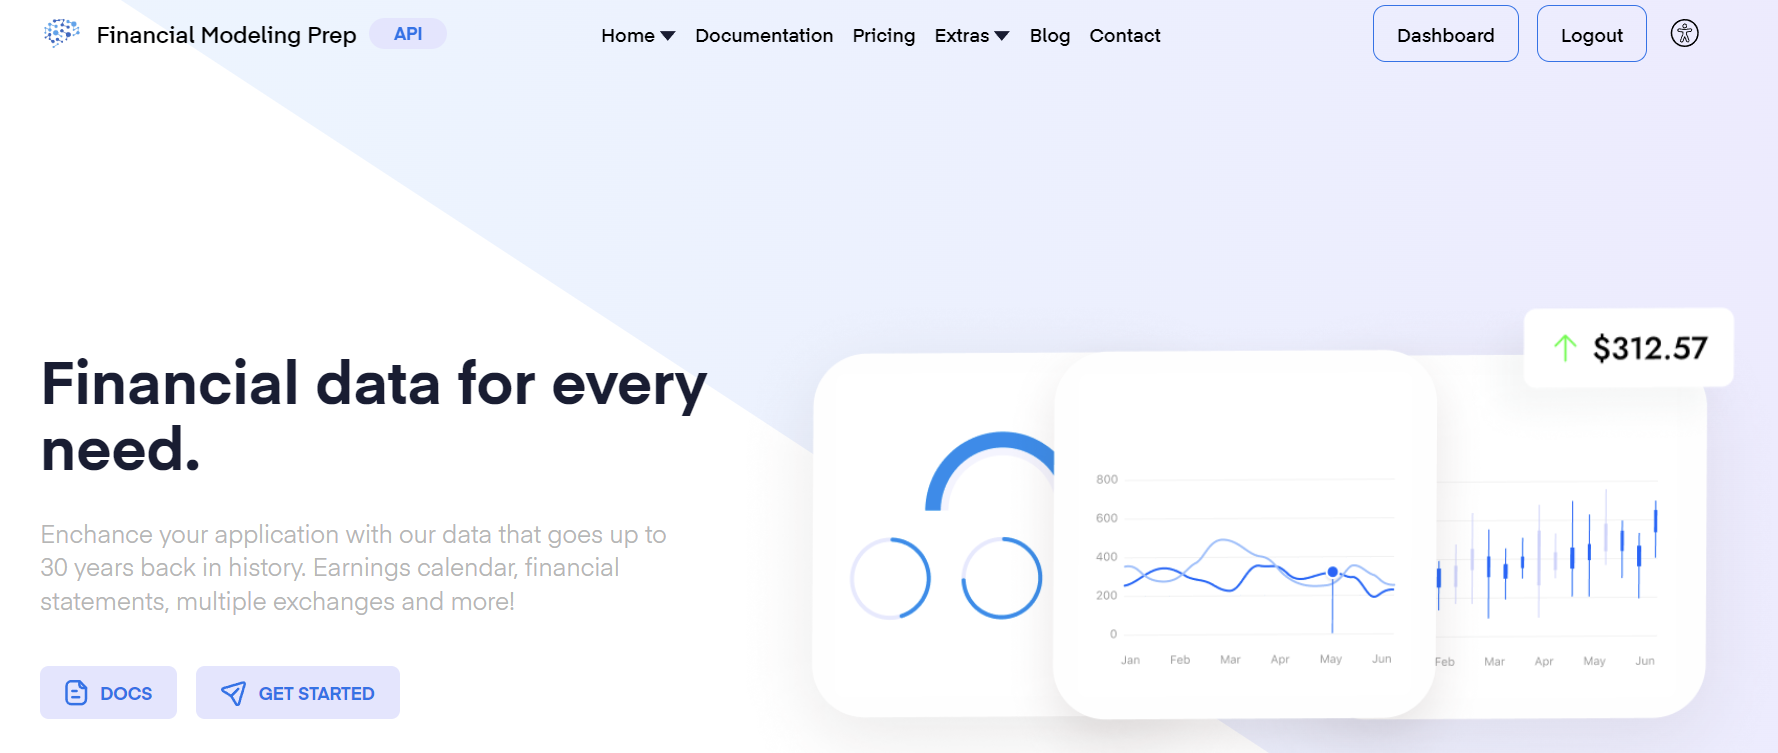

You need to sign up for an account at https://financialmodelingprep.com/developer to get an API key for free (250 requests). Financial Modelling Prep has many financial APIs endpoints (stock data, news, performance, financial statements, fundamental analysis) to work with.

Go to the Dashboard to obtain your API key. Enter your API key in the next cell to store it in the environment variable "FMP_API_KEY" (or use any other method such as using the cmd line to store it). In the following cell, we will then get the apikey stored in the environment variable to use for our requests later.

In [2]:
import os
# uncomment and enter API Key below
#os.environ['FMP_API_KEY'] = "your_api_key"

In [3]:
apiKey = os.environ['FMP_API_KEY']
ticker = "AAPL"
ticker = ticker.upper() # make sure ticker is caps

## Obtain Financial Statements Data from by Parsing JSON data from Financial Modeling Prep API

### Quarterly Cash Flow Statement (Most Recent 4 Quarters)

For summing up to calculate the most recent trailing twelve months (TTM) cash flow.
NOTE: Unfortunately for the free API, you will be unable to get quarterly data (only annual), in which case you can choose to just run the annual cash flow statement and use the end of last year's cash flow as the most recent cash flow (would eventually result in a less accurate estimate).

In [4]:
columns_drop = ['acceptedDate', 'period', 'symbol', 'reportedCurrency', 'cik', 'fillingDate', 'depreciationAndAmortization', 'link', 'finalLink']
q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').drop(columns_drop, axis=1).iloc[:4] # extract for last 4 quarters
#q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')
latest_year = int(q_cash_flow_statement.iloc[0]['calendarYear'])
q_cash_flow_statement.iloc[:,4:].head()

changeInWorkingCapital  accountsReceivables   inventory  \
date                                                                  
2023-07-01             -2009000000          -1987000000   -22000000   
2023-04-01               231000000           5321000000  -741000000   
2022-12-31             -1497000000           4275000000 -1807000000   
2022-09-24               -48000000          -6384000000   435000000   

            accountsPayables  otherWorkingCapital  otherNonCashItems  \
date                                                                   
2023-07-01        3974000000          -3974000000         3447000000   
2023-04-01      -14689000000          10340000000        -1415000000   
2022-12-31       -6075000000           2110000000         -317000000   
2022-09-24       15556000000          -9655000000          172000000   

            netCashProvidedByOperatingActivities  \
date                                               
2023-07-01                           26380000000   
2023-04-01                           28560000000   
2022-12-31                           34005000000   
2022-09-24                           24127000000   

            investmentsInPropertyPlantAndEquipment  acquisitionsNet  \
date                                                                  
2023-07-01                             -2093000000                0   
2023-04-01                             -2916000000                0   
2022-12-31                             -3787000000                0   
2022-09-24                             -3289000000       -137000000   

            purchasesOfInvestments  ...  dividendsPaid  \
date                                ...                  
2023-07-01             -9759000000  ...    -3849000000   
2023-04-01             -6044000000  ...    -3650000000   
2022-12-31             -5153000000  ...    -3768000000   
2022-09-24             -6745000000  ...    -3703000000   

            otherFinancingActivites  netCashUsedProvidedByFinancingActivities  \
date                                                                            
2023-07-01              -2438000000                              -24048000000   
2023-04-01               3484000000                              -25724000000   
2022-12-31              -2705000000                              -35563000000   
2022-09-24               4130000000                              -26794000000   

            effectOfForexChangesOnCash  netChangeInCash  cashAtEndOfPeriod  \
date                                                                         
2023-07-01                           0       2769000000        29898000000   
2023-04-01                           0       5155000000        27129000000   
2022-12-31                           0      -3003000000        21974000000   
2022-09-24                           0      -3884000000        24977000000   

            cashAtBeginningOfPeriod  operatingCashFlow  capitalExpenditure  \
date                                                                         
2023-07-01              27129000000        26380000000         -2093000000   
2023-04-01              21974000000        28560000000         -2916000000   
2022-12-31              24977000000        34005000000         -3787000000   
2022-09-24              28861000000        24127000000         -3289000000   

            freeCashFlow  
date                      
2023-07-01   24287000000  
2023-04-01   25644000000  
2022-12-31   30218000000  
2022-09-24   20838000000  

[4 rows x 26 columns]

### Annual Cash Flow Statement

In [5]:
cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date').drop(columns_drop, axis=1)
#cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

changeInWorkingCapital  accountsReceivables   inventory  \
date                                                                  
2022-09-24              1200000000          -1823000000  1484000000   
2021-09-25             -4911000000         -10125000000 -2642000000   
2020-09-26              5690000000           6917000000  -127000000   
2019-09-28             -3488000000            245000000  -289000000   
2018-09-29             34694000000          -5322000000   828000000   

            accountsPayables  otherWorkingCapital  otherNonCashItems  \
date                                                                   
2022-09-24        9448000000          -7909000000          111000000   
2021-09-25       12326000000          -4470000000         -147000000   
2020-09-26       -4062000000           2962000000          -97000000   
2019-09-28       -1923000000          -1521000000         -652000000   
2018-09-29        9175000000          30013000000         -444000000   

            netCashProvidedByOperatingActivities  \
date                                               
2022-09-24                          122151000000   
2021-09-25                          104038000000   
2020-09-26                           80674000000   
2019-09-28                           69391000000   
2018-09-29                           77434000000   

            investmentsInPropertyPlantAndEquipment  acquisitionsNet  \
date                                                                  
2022-09-24                            -10708000000       -306000000   
2021-09-25                            -11085000000        -33000000   
2020-09-26                             -7309000000      -1524000000   
2019-09-28                            -10495000000       -624000000   
2018-09-29                            -13313000000       -721000000   

            purchasesOfInvestments  ...  dividendsPaid  \
date                                ...                  
2022-09-24            -76923000000  ...   -14841000000   
2021-09-25           -109558000000  ...   -14467000000   
2020-09-26           -115148000000  ...   -14081000000   
2019-09-28            -40631000000  ...   -14119000000   
2018-09-29            -73227000000  ...   -13712000000   

            otherFinancingActivites  netCashUsedProvidedByFinancingActivities  \
date                                                                            
2022-09-24               3037000000                             -110749000000   
2021-09-25              14730000000                              -93353000000   
2020-09-26              12331000000                              -86820000000   
2019-09-28              -1936000000                              -90976000000   
2018-09-29               4405000000                              -87876000000   

            effectOfForexChangesOnCash  netChangeInCash  cashAtEndOfPeriod  \
date                                                                         
2022-09-24                           0     -10952000000        24977000000   
2021-09-25                           0      -3860000000        35929000000   
2020-09-26                           0     -10435000000        39789000000   
2019-09-28                           0      24311000000        50224000000   
2018-09-29                           0       5624000000        25913000000   

            cashAtBeginningOfPeriod  operatingCashFlow  capitalExpenditure  \
date                                                                         
2022-09-24              35929000000       122151000000        -10708000000   
2021-09-25              39789000000       104038000000        -11085000000   
2020-09-26              50224000000        80674000000         -7309000000   
2019-09-28              25913000000        69391000000        -10495000000   
2018-09-29              20289000000        77434000000        -13313000000   

            freeCashFlow  
date                      
2022-09-24  11144300000

### Cash Flow Statement (Annual + TTM)

In [6]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

accountsReceivables   inventory  accountsPayables  \
date                                                            
TTM                  1225000000 -2135000000       -1234000000   
2022-09-24          -1823000000  1484000000        9448000000   
2021-09-25         -10125000000 -2642000000       12326000000   
2020-09-26           6917000000  -127000000       -4062000000   
2019-09-28            245000000  -289000000       -1923000000   

            otherWorkingCapital  otherNonCashItems  \
date                                                 
TTM                 -1179000000         1887000000   
2022-09-24          -7909000000          111000000   
2021-09-25          -4470000000         -147000000   
2020-09-26           2962000000          -97000000   
2019-09-28          -1521000000         -652000000   

            netCashProvidedByOperatingActivities  \
date                                               
TTM                                 113072000000   
2022-09-24                          122151000000   
2021-09-25                          104038000000   
2020-09-26                           80674000000   
2019-09-28                           69391000000   

            investmentsInPropertyPlantAndEquipment  acquisitionsNet  \
date                                                                  
TTM                                   -12085000000       -137000000   
2022-09-24                            -10708000000       -306000000   
2021-09-25                            -11085000000        -33000000   
2020-09-26                             -7309000000      -1524000000   
2019-09-28                            -10495000000       -624000000   

            purchasesOfInvestments  salesMaturitiesOfInvestments  ...  \
date                                                              ...   
TTM                   -27701000000                   41367000000  ...   
2022-09-24            -76923000000                   67363000000  ...   
2021-09-25           -109558000000                  106483000000  ...   
2020-09-26           -115148000000                  120483000000  ...   
2019-09-28            -40631000000                   98724000000  ...   

            dividendsPaid  otherFinancingActivites  \
date                                                 
TTM          -14970000000               2471000000   
2022-09-24   -14841000000               3037000000   
2021-09-25   -14467000000              14730000000   
2020-09-26   -14081000000              12331000000   
2019-09-28   -14119000000              -1936000000   

            netCashUsedProvidedByFinancingActivities  \
date                                                   
TTM                                    -112129000000   
2022-09-24                             -110749000000   
2021-09-25                              -93353000000   
2020-09-26                              -86820000000   
2019-09-28                              -90976000000   

            effectOfForexChangesOnCash  netChangeInCash  cashAtEndOfPeriod  \
date                                                                         
TTM                                  0       1037000000       103978000000   
2022-09-24                           0     -10952000000        24977000000   
2021-09-25                           0      -3860000000        35929000000   
2020-09-26                           0     -10435000000        39789000000   
2019-09-28                           0      24311000000        50224000000   

            cashAtBeginningOfPeriod  operatingCashFlow  capitalExpenditure  \
date                                                                         
TTM                    102941000000       113072000000        -12085000000   
2022-09-24              35929000000       122151000000        -10708000000   
2021-09-25              39789000000       104038000000        -11085000000   
2020-09-26              50224000000        80674000000         -7309000000   
2019-09-28     

### Check Stability of Free Cash Flows

DCF model works best only if the free cash flows are stable and steadily increasing. So let's plot the graph and verify if this is the case.

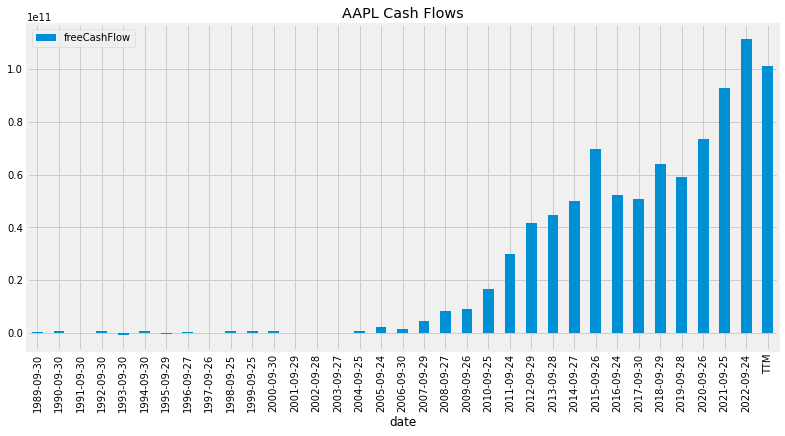

In [7]:
cash_flow_statement[['freeCashFlow']].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

### Same as Above but Plotted using Plotly

In [8]:
fig_cash_flow = px.bar(cash_flow_statement , y='freeCashFlow', title=ticker + ' Free Cash Flows')
fig_cash_flow.update_xaxes(type='category', tickangle=270, title='Date')
fig_cash_flow.update_yaxes(title='Free Cash Flows')
fig_cash_flow.show()

### Quarterly Balance Sheet Statement

To extract debt and cash & short term investments for the most recent quarter.

In [9]:
columns_drop = ['acceptedDate', 'calendarYear', 'period', 'symbol', 'reportedCurrency', 'cik', 'fillingDate', 'link', 'finalLink']
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date').drop(columns_drop, axis=1)
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

inventory  otherCurrentAssets  totalCurrentAssets  \
date                                                             
2022-09-24  4946000000         21223000000        135405000000   
2021-09-25  6580000000         14111000000        134836000000   
2020-09-26  4061000000         11264000000        143713000000   
2019-09-28  4106000000         12352000000        162819000000   
2018-09-29  3956000000         12087000000        131339000000   

            propertyPlantEquipmentNet  goodwill  intangibleAssets  \
date                                                                
2022-09-24                42117000000         0                 0   
2021-09-25                39440000000         0                 0   
2020-09-26                36766000000         0                 0   
2019-09-28                37378000000         0                 0   
2018-09-29                41304000000         0                 0   

            goodwillAndIntangibleAssets  longTermInvestments  taxAssets  \
date                                                                      
2022-09-24                            0         120805000000          0   
2021-09-25                            0         127877000000          0   
2020-09-26                            0         100887000000          0   
2019-09-28                            0         105341000000          0   
2018-09-29                            0         170799000000          0   

            otherNonCurrentAssets  ...  \
date                               ...   
2022-09-24            54428000000  ...   
2021-09-25            48849000000  ...   
2020-09-26            42522000000  ...   
2019-09-28            32978000000  ...   
2018-09-29            22283000000  ...   

            accumulatedOtherComprehensiveIncomeLoss  \
date                                                  
2022-09-24                             -11109000000   
2021-09-25                                163000000   
2020-09-26                               -406000000   
2019-09-28                               -584000000   
2018-09-29                              -3454000000   

            othertotalStockholdersEquity  totalStockholdersEquity  \
date                                                                
2022-09-24                             0              50672000000   
2021-09-25                             0              63090000000   
2020-09-26                             0              65339000000   
2019-09-28                             0              90488000000   
2018-09-29                             0             107147000000   

             totalEquity  totalLiabilitiesAndStockholdersEquity  \
date                                                              
2022-09-24   50672000000                           352755000000   
2021-09-25   63090000000                           351002000000   
2020-09-26   65339000000                           323888000000   
2019-09-28   90488000000                           338516000000   
2018-09-29  107147000000                           365725000000   

            minorityInterest  totalLiabilitiesAndTotalEquity  \
date                                                           
2022-09-24                 0                    352755000000   
2021-09-25                 0                    351002000000   
2020-09-26                 0                    323888000000   
2019-09-28                 0                    338516000000   
2018-09-29                 0                    365725000000   

            totalInvestments     totalDebt      netDebt  
date                                                     
2022-09-24      145463000000  120069000000  96423000000  
2021-09-25      155576000000  124719000000  89779000000  
2020-09-26      153814000000  112436000000  74420000000  
2019-09-28      157054000000  108047000000  59203000000  
2018-09-29      211187000000  114483000000  88570000000  

[5 rows x 40 columns]

## Free Cash Flow, Total Debt, Cash and Short Term Investments
Extracted from Dataframes Above

In [10]:
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow'] # ttm cash flow
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("TTM Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

TTM Free Cash Flow:  100987000000
Total Debt:  120069000000
Cash and ST Investments:  48304000000


# Extract and Parse Data from Finviz

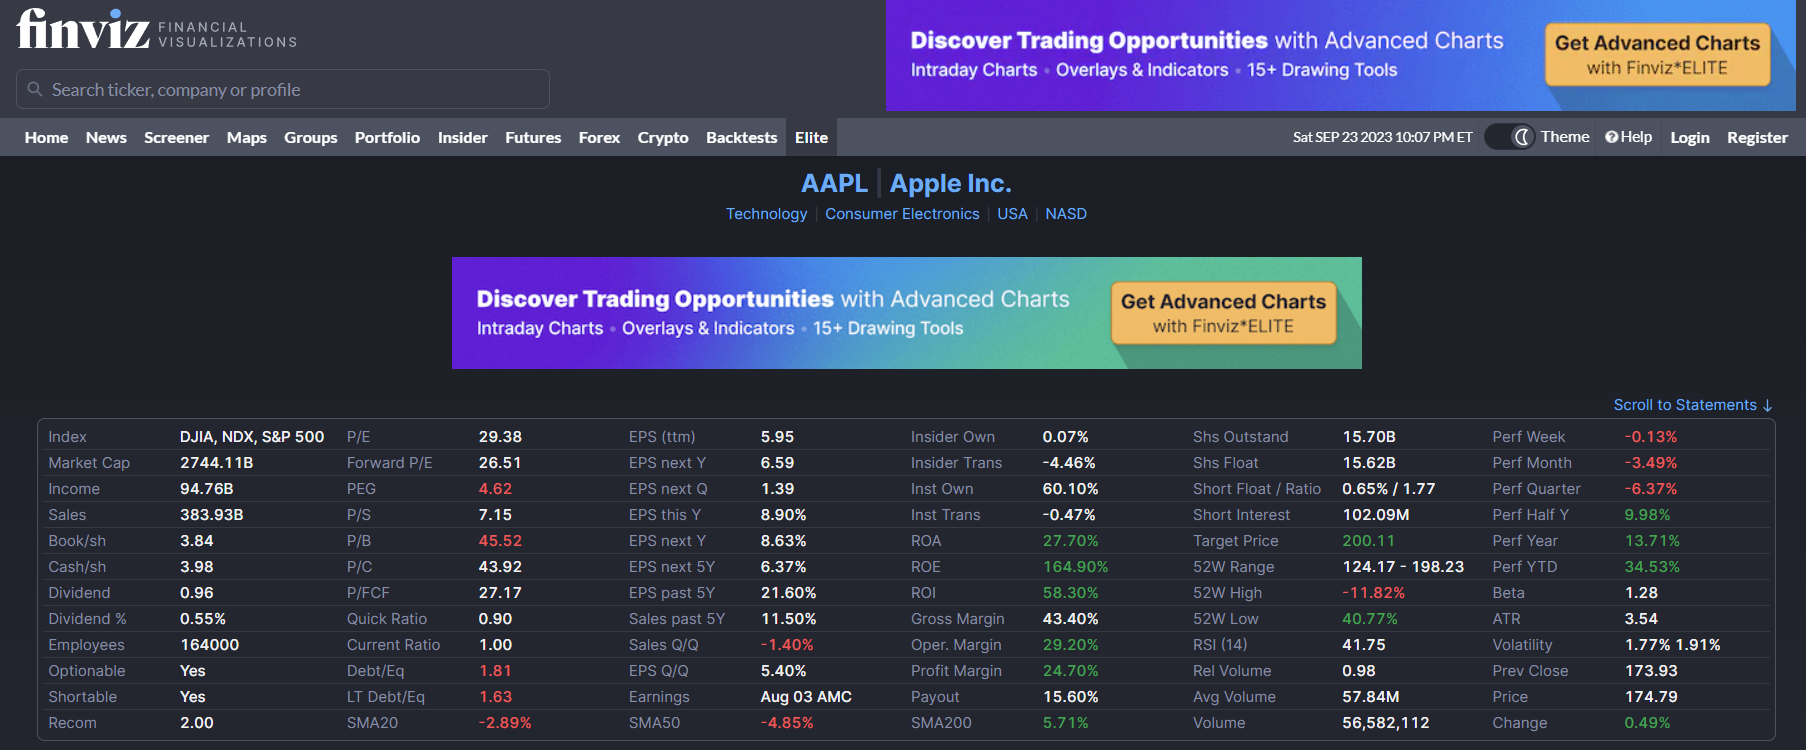

## Price, EPS next Y/5Y, Beta, Number of Shares Outstanding

Extract (using requests.get) and Parse (using Beautiful Soup) data from Finviz table in the Finviz website (see screenshot above), needed to calculate intrinsic value of stock.

In [11]:
# List of data we want to extract from Finviz Table
# Price is the current stock price
# EPS next Y is the estimated earnings growth for next year
# EPS next 5Y is the estimated earnings growth for next 5 years (if this is not present on finviz, we will use EPS next Y instead)
# Beta captures the volatility of the stock, used for estimating discount rate later
# Shs Outstand is the number of shares present in the market
metric = ['Price', 'EPS next Y', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find_all(text = metric)[-1].find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)

finviz_data

{'Price': 174.79,
 'EPS next Y': 8.63,
 'EPS next 5Y': 6.37,
 'Beta': 1.28,
 'Shs Outstand': 15700000000.0}

## Estimate Discount Rate from Beta

Beta shows the volatility of the stock, the higher the beta, we want to be more conservative by increasing the discount rate also.

In [12]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)

Discount Rate:  7.5


In [13]:
finviz_data['EPS next 5Y']

6.37

In [14]:
finviz_data['EPS next Y']

8.63

## Print All Data Needed for Intrinsic Value Calculation
## Including EPS Growth 5Y, Shares Outstanding

In [15]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
# sometimes EPS next 5Y is empty and shows as a '-' string, in this case use EPS next Y
if isinstance(EPS_growth_5Y, str):
    if not EPS_growth_5Y.isdigit():
        EPS_growth_5Y = finviz_data['EPS next Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
# Long term = previous growth rate or around long term inflation rate, whichever is lower to be conservative estimate
long_term_growth_rate = np.minimum(EPS_growth_6Y_to_10Y, 3)      
shares_outstanding = finviz_data['Shs Outstand']

print("TTM Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("Long Term Growth Rate: ", long_term_growth_rate)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

TTM Free Cash Flow:  100987000000
Total Debt:  120069000000
Cash and ST Investments:  48304000000
EPS Growth 5Y:  6.37
EPS Growth 6Y to 10Y:  3.185
Long Term Growth Rate:  3.0
Discount Rate:  7.5
Shares Outstanding:  15700000000.0


## Calculate Intrinsic Value
1. First Project Cash Flows from Year 1 to Year 10 using Present (TTM) Free Cash Flow
2. Discount the Cash Flows to Present Value
3. Calculate the Terminal Value after Year 10 (Discounted to Present Value) Assuming the Company will Grow at a Constant Steady Rate Forever (https://corporatefinanceinstitute.com/resources/financial-modeling/dcf-terminal-value-formula/)
4. Add the Cash Flows and the Terminal Value Up
5. Then Account for the Cash + Short Term Investments and Subtract Total Debt
6. Divide by Total Number of Shares Outstanding

In [16]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, long_term_growth_rate,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    long_term_growth_rate_d = long_term_growth_rate/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year + latest_year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year + latest_year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year + latest_year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year + latest_year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df = df.set_index('Year')
    
    # Plot using matplotlib
    # df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    # plt.show()
    
    # Plot using plotly
    fig_cash_forecast = px.bar(df, barmode='group', title=ticker + ' Projected Free Cash Flows')
    fig_cash_forecast.update_xaxes(type='category', tickangle=270)
    fig_cash_forecast.update_xaxes(tickangle=270, title='Forecasted Year')
    fig_cash_forecast.update_yaxes(title='Free Cash Flows')
    fig_cash_forecast.show()

    # Growth in Perpuity Approach    
    print("Growth in Perpuity Approach\n")
    cashflow_10Y = cash_flow_discounted_list[-1]
    print("10th Year Cashflow: ", cashflow_10Y)
    print("Long Term Growth Rate: ", long_term_growth_rate)
    # Formula to Calculate: https://corporatefinanceinstitute.com/resources/financial-modeling/dcf-terminal-value-formula/
    terminal_value = cashflow_10Y*(1+long_term_growth_rate_d)/(discount_rate_d-long_term_growth_rate_d)
    print("Terminal Value: ", terminal_value)
    
    
    intrinsic_value = (sum(cash_flow_discounted_list) + terminal_value - total_debt + cash_and_ST_investments)/shares_outstanding
    
    return intrinsic_value


intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, long_term_growth_rate,
                                  shares_outstanding, discount_rate)    

Discounted Cash Flows

Year 2024: $99925462232.55815
Year 2025: $98875082955.13687
Year 2026: $97835744873.84102
Year 2027: $96807331927.7253
Year 2028: $95789729275.83388
Year 2029: $91944774096.06436
Year 2030: $88254153628.85954
Year 2031: $84711672950.64069
Year 2032: $81311385799.18008
Year 2033: $78047584592.4502


Growth in Perpuity Approach

10th Year Cashflow:  78047584592.4502
Long Term Growth Rate:  3.0
Terminal Value:  1786422491782.7493


## Print Intrinsic Value, Current Share Price, Margin of Safety

In [17]:
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)    

Intrinsic Value:  167.39875249140377
Current Price:  174.79
Margin of Safety:  -4.415353996724547


# Put All the Above Into a Single Script

In [18]:
# Importing required modules
import pandas as pd
import numpy as np
import numpy as np
import plotly.express as px

# To extract and parse fundamental data like beta and growth estimates from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json

# For Gradio App
import gradio as gr

import os
# uncomment and set API Key in the environment variable below
# or you can choose to set it using any other method you know
#os.environ['FMP_API_KEY'] = "your_api_key"

# read the environment variable to use in API requests later
apiKey = os.environ['FMP_API_KEY']


############################################################################################################
###### GET DATA FROM FINANCIAL MODELING PREP
############################################################################################################

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# get financial statements using financial modelling prep API
def get_financial_statements(ticker):
    # quarterly cash flow statements for calculating latest trailing twelve months (TTM) free cash flow
    columns_drop = ['acceptedDate', 'period', 'symbol', 'reportedCurrency', 'cik', 'fillingDate', 'depreciationAndAmortization', 'link', 'finalLink']
    q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
    q_cash_flow_statement = q_cash_flow_statement.set_index('date').drop(columns_drop, axis=1).iloc[:4] # extract for last 4 quarters
    latest_year = int(q_cash_flow_statement.iloc[0]['calendarYear'])

    # annual cash flow statements
    cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
    cash_flow_statement = cash_flow_statement.set_index('date').drop(columns_drop, axis=1)
    
    # combine annual and latest TTM cash flow statements
    ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
    cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
    final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
    
    # quarterly balance sheet statements
    columns_drop = ['acceptedDate', 'calendarYear', 'period', 'symbol', 'reportedCurrency', 'cik', 'fillingDate', 'link', 'finalLink']
    q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?' + '&apikey=' + apiKey))
    q_balance_statement = q_balance_statement.set_index('date').drop(columns_drop, axis=1)
    q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
        
    return q_cash_flow_statement, cash_flow_statement, final_cash_flow_statement, q_balance_statement, latest_year
 
 
# check stability of cash flows
def plot_cash_flow(ticker, cash_flow_statement):       
    # DCF model works best only if the free cash flows are POSITIVE, STABLE and STEADILY INCREASING. 
    # So let's plot the graph and verify if this is the case.
    fig_cash_flow = px.bar(cash_flow_statement , y='freeCashFlow', title=ticker + ' Free Cash Flows')
    fig_cash_flow.update_xaxes(type='category', tickangle=270, title='Date')
    fig_cash_flow.update_yaxes(title='Free Cash Flows')
    #fig_cash_flow.show()
    return fig_cash_flow


# get ttm cash flow, most recent total debt and cash & short term investment data from statements
def get_statements_data(final_cash_flow_statement, q_balance_statement):
    cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow'] # ttm cash flow
    total_debt = q_balance_statement.iloc[0]['totalDebt'] 
    cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']
    return cash_flow, total_debt, cash_and_ST_investments


############################################################################################################
###### GET DATA FROM FINVIZ WEBSITE 
############################################################################################################

# Price, EPS next Y/5Y, Beta, Number of Shares Outstanding
# Extract (using requests.get) and Parse (using Beautiful Soup) data from Finviz table in the Finviz website (see screenshot above), needed to calculate intrinsic value of stock.

# List of data we want to extract from Finviz Table
# Price is the current stock price
# EPS next Y is the estimated earnings growth for next year
# EPS next 5Y is the estimated earnings growth for next 5 years (if this is not present on finviz, we will use EPS next Y instead)
# Beta captures the volatility of the stock, used for estimating discount rate later
# Shs Outstand is the number of shares present in the market
metric = ['Price', 'EPS next Y', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find_all(text = metric)[-1].find_next(class_='snapshot-td2').text

# get above metrics from finviz and store as a dict 
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz


def parse_finviz_dict(finviz_dict):
    EPS_growth_5Y = finviz_dict['EPS next 5Y']
    # sometimes EPS next 5Y is empty and shows as a '-' string, in this case use EPS next Y
    if isinstance(EPS_growth_5Y, str):
        if not EPS_growth_5Y.isdigit():
            EPS_growth_5Y = finviz_dict['EPS next Y']
    EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
    # Long term = previous growth rate or around long term inflation rate, whichever is lower to be conservative estimate
    long_term_growth_rate = np.minimum(EPS_growth_6Y_to_10Y, 3) 
    shares_outstanding = finviz_dict['Shs Outstand']
    beta = finviz_dict['Beta']
    current_price = finviz_dict['Price']
    
    return EPS_growth_5Y, EPS_growth_6Y_to_10Y, long_term_growth_rate, beta, shares_outstanding, current_price


## Estimate Discount Rate from Beta
def estimate_discount_rate(beta):
    # Beta shows the volatility of the stock, 
    # the higher the beta, we want to be more conservative by increasing the discount rate also.
    discount_rate = 7
    if(beta<0.80):
        discount_rate = 5
    elif(beta>=0.80 and beta<1):
        discount_rate = 6
    elif(beta>=1 and beta<1.1):
        discount_rate = 6.5
    elif(beta>=1.1 and beta<1.2):
        discount_rate = 7
    elif(beta>=1.2 and beta<1.3):
        discount_rate = 7.5
    elif(beta>=1.3 and beta<1.4):
        discount_rate = 8
    elif(beta>=1.4 and beta<1.6):
        discount_rate = 8.5
    elif(beta>=1.61):
        discount_rate = 9   

    return discount_rate


############################################################################################################
## Calculate Intrinsic Value
############################################################################################################

# 1. First Project Cash Flows from Year 1 to Year 10 using Present (TTM) Free Cash Flow
# 2. Discount the Cash Flows to Present Value
# 3. Calculate the Terminal Value after Year 10 (Discounted to Present Value) Assuming the Company will Grow at a Constant Steady Rate Forever (https://corporatefinanceinstitute.com/resources/financial-modeling/dcf-terminal-value-formula/)
# 4. Add the Cash Flows and the Terminal Value Up
# 5. Then Account for the Cash + Short Term Investments and Subtract Total Debt
# 6. Divide by Total Number of Shares Outstanding

def calculate_intrinsic_value(latest_year, cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, long_term_growth_rate,
                                  shares_outstanding, discount_rate, current_price):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    long_term_growth_rate_d = long_term_growth_rate/100
    discount_rate_d = discount_rate/100
    # print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
        
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year + latest_year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        # print("Year " + str(year + latest_year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year + latest_year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        # print("Year " + str(year + latest_year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Store all forecasted cash flows in dataframe
    forecast_cash_flows_df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    forecast_cash_flows_df = forecast_cash_flows_df.set_index('Year')
    
    # Growth in Perpuity Approach    
    cashflow_10Y = cash_flow_discounted_list[-1]
    # Formula to Calculate: https://corporatefinanceinstitute.com/resources/financial-modeling/dcf-terminal-value-formula/
    terminal_value = cashflow_10Y*(1+long_term_growth_rate_d)/(discount_rate_d-long_term_growth_rate_d)
    
    # Yay finally
    intrinsic_value = (sum(cash_flow_discounted_list) + terminal_value - total_debt + cash_and_ST_investments)/shares_outstanding
    margin_of_safety = (1-current_price/intrinsic_value)*100
    
    return forecast_cash_flows_df, terminal_value, intrinsic_value, margin_of_safety


# Plot forecasted cash flows from years 1 to 10, as well as the discounted cash flows
def plot_forecasted_cash_flows(ticker, forecast_cash_flows_df):

    fig_cash_forecast = px.bar(forecast_cash_flows_df, barmode='group', title=ticker + ' Projected Free Cash Flows')
    fig_cash_forecast.update_xaxes(type='category', tickangle=270)
    fig_cash_forecast.update_xaxes(tickangle=270, title='Forecasted Year')
    fig_cash_forecast.update_yaxes(title='Free Cash Flows')
    # fig_cash_forecast.show()
    
    return fig_cash_forecast


# chain all the steps from the functions above together
def run_all_steps(ticker):
    ticker = ticker.upper() # make sure ticker is caps
    
    q_cash_flow_statement, cash_flow_statement, final_cash_flow_statement, q_balance_statement, latest_year = get_financial_statements(ticker)

    fig_cash_flow = plot_cash_flow(ticker, cash_flow_statement)

    cash_flow, total_debt, cash_and_ST_investments = get_statements_data(final_cash_flow_statement, q_balance_statement)

    finviz_dict = get_finviz_data(ticker)

    EPS_growth_5Y, EPS_growth_6Y_to_10Y, long_term_growth_rate, beta, shares_outstanding, current_price = parse_finviz_dict(finviz_dict)

    discount_rate = estimate_discount_rate(beta)

    forecast_cash_flows_df, terminal_value, intrinsic_value, margin_of_safety = calculate_intrinsic_value(latest_year, cash_flow, total_debt, cash_and_ST_investments, 
                                      EPS_growth_5Y, EPS_growth_6Y_to_10Y, long_term_growth_rate,
                                      shares_outstanding, discount_rate, current_price)

    fig_cash_forecast = plot_forecasted_cash_flows(ticker, forecast_cash_flows_df)
    
    return q_cash_flow_statement.reset_index(), final_cash_flow_statement.reset_index(), q_balance_statement.reset_index(), fig_cash_flow, \
        str(EPS_growth_5Y) + '%' , str(EPS_growth_6Y_to_10Y) + '%', str(long_term_growth_rate) + '%', \
        beta, shares_outstanding, current_price, \
        discount_rate, forecast_cash_flows_df.reset_index(), terminal_value, intrinsic_value, fig_cash_forecast, margin_of_safety
    

In [21]:
run_all_steps("TSLA")

(         date calendarYear   netIncome  deferredIncomeTax  \
 0  2023-06-30         2023  2614000000                  0   
 1  2023-03-31         2023  2539000000                  0   
 2  2022-12-31         2022  3707000000                  0   
 3  2022-09-30         2022  3331000000                  0   
 
    stockBasedCompensation  changeInWorkingCapital  accountsReceivables  \
 0               445000000             -1101000000           -472000000   
 1               418000000             -1530000000            -32000000   
 2               419000000             -2191000000           -698000000   
 3               362000000               231000000           -193000000   
 
     inventory  accountsPayables  otherWorkingCapital  ...  dividendsPaid  \
 0  -576000000        -622000000            569000000  ...              0   
 1 -1540000000         797000000           -755000000  ...              0   
 2 -1973000000        6029000000          -5549000000  ...              0   
 3 